In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Import data file
data_directory = 'C:/Users/mvmigem/Documents/data/project_1/raw_data/'
dir_list = glob.glob(data_directory+'sub_*/behav/*.csv')


In [5]:
df_list = []
for i in range(len(dir_list)):
    behav_dat = pd.read_csv(dir_list[i])
    df_list.append(behav_dat)

big_df = pd.concat(df_list,ignore_index=True)

In [6]:
"""
***Aestetics***
"""
# load color palette
my_palette = sns.color_palette().as_hex()
sns.color_palette().as_hex()


['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

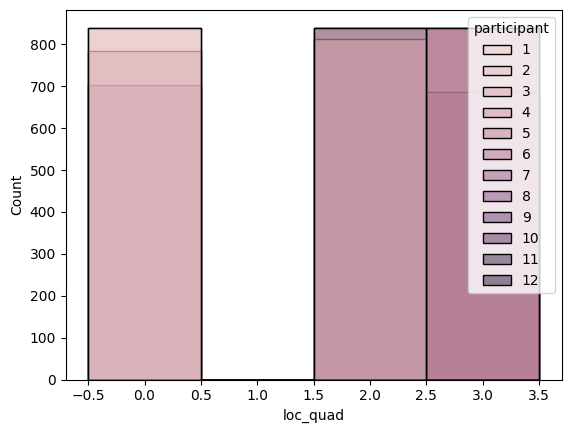

In [11]:
ax = sns.histplot(data=big_df, x='loc_quad',hue='participant',discrete=True)

In [ ]:
ax = sns.boxplot(data= big_df, x='attention',y='')